## Analyse Volumen
Vergleich und Analyse der Gebäudevolumen

In [43]:
import src.package.charts as charts
import src.package.importer as im
import src.package.consts as c
import seaborn as sns

# set size of seaborn plots
charts.set_plot_size(sns)

df = im.get_dataset('../package/dataset.csv')


#### Volumen RI SIA 116

In [44]:
df[c.FIELD_VOLUME_TOTAL_116].describe()

count       475.000000
mean      28468.892632
std       38813.180364
min         356.000000
25%        6437.000000
50%       16752.000000
75%       32965.000000
max      315370.000000
Name: volume_total_116, dtype: float64

#### Volumen GV SIA 416

In [45]:
df[c.FIELD_VOLUME_TOTAL_416].describe()

count       669.000000
mean      23990.756353
std       32883.672239
min         167.000000
25%        4540.000000
50%       12600.000000
75%       29393.000000
max      272000.000000
Name: volume_total_416, dtype: float64

### Vergleich
Abweichung **absolut**

In [46]:
volume_df = df.copy().loc[:, [c.FIELD_VOLUME_TOTAL_416, c.FIELD_VOLUME_TOTAL_116]]
volume_df = volume_df.dropna()
volume_df['diff_volume_abs'] = volume_df.eval(f'{c.FIELD_VOLUME_TOTAL_416} - {c.FIELD_VOLUME_TOTAL_116}').abs()
volume_df['diff_volume_abs'].describe()

count      201.000000
mean      2980.099502
std       4662.442863
min          0.000000
25%        375.000000
50%       1372.000000
75%       3252.000000
max      29248.000000
Name: diff_volume_abs, dtype: float64

Abweichung in **Prozent**

In [47]:
volume_df['diff_volume_abs_percent'] = (df[c.FIELD_VOLUME_TOTAL_116] - volume_df[c.FIELD_VOLUME_TOTAL_416]) / volume_df[
    c.FIELD_VOLUME_TOTAL_116] * 100
volume_df['diff_volume_abs_percent'].describe()

count    201.000000
mean      13.004469
std        8.199621
min        0.000000
25%        8.073112
50%       11.029412
75%       16.473616
max       48.296122
Name: diff_volume_abs_percent, dtype: float64

### Visualisierung Abweichung absolut

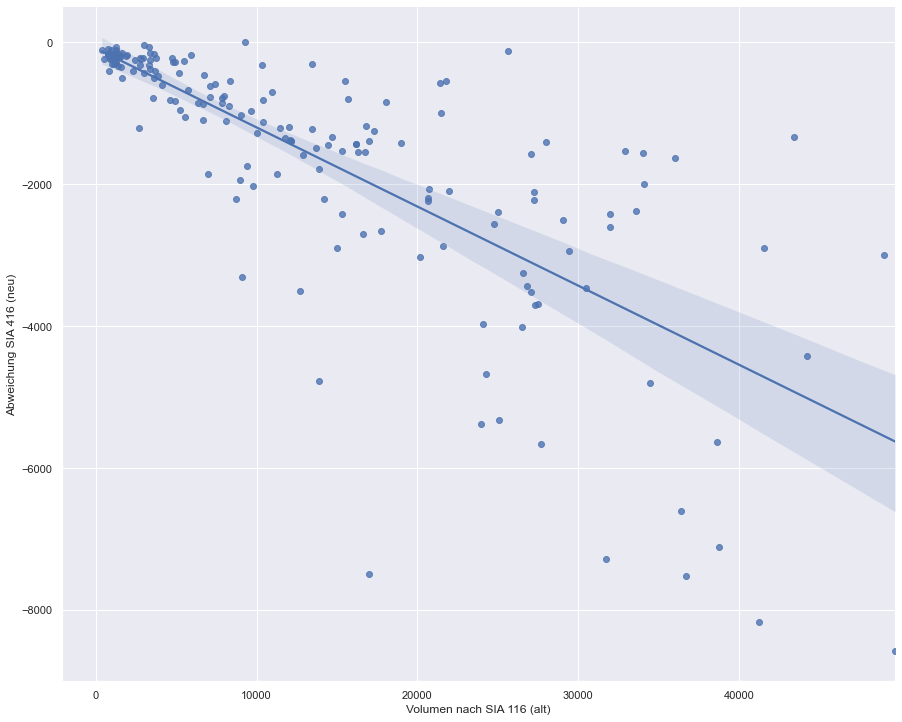

In [48]:
dta = df.copy()
# dta = dta[~dta[c.FIELD_USAGE_CLUSTER].isin(['ANDERES','OFFENE_BAUTEN', 'TECHNIK','IRRELEVANT','AUSSENANLAGEN', 'GESUNDHEIT'])]
dta['diff_volume'] = df.eval(f'{c.FIELD_VOLUME_TOTAL_416} - {c.FIELD_VOLUME_TOTAL_116}')
dta = dta[['diff_volume', c.FIELD_VOLUME_TOTAL_116, c.FIELD_USAGE_CLUSTER]]
dta = dta[dta[c.FIELD_VOLUME_TOTAL_116] < 50000]

# plot absolute values
gf = sns.lmplot(
    data=dta,
    x=c.FIELD_VOLUME_TOTAL_116, y='diff_volume',
    height=charts.CHART_HEIGHT, aspect=charts.CHART_HEIGHT / charts.CHART_WIDTH
    # , hue=c.FIELD_USAGE_CLUSTER
)

gf.set(xlabel='Volumen nach SIA 116 (alt)', ylabel='Abweichung SIA 416 (neu)')


### Beschreibung Abweichung Prozent

In [49]:
# describe percentage
dta['diff_volume_abs_percent'] = (df[c.FIELD_VOLUME_TOTAL_116] - volume_df[c.FIELD_VOLUME_TOTAL_416]) / volume_df[
    c.FIELD_VOLUME_TOTAL_116] * 100
dta = dta[[c.FIELD_USAGE_CLUSTER, 'diff_volume_abs_percent']]
dta.groupby(c.FIELD_USAGE_CLUSTER).describe()


diff_volume_abs_percent                                   \
                                count       mean        std        min   
usage_cluster                                                            
ANDERES                           2.0  20.410191   1.638277  19.251754   
BEHERBERGUNG                     10.0  11.967511   6.153099   3.508319   
BETRIEB                          16.0  16.358182   9.531191   5.816786   
BUERO                            17.0   8.378158   4.574409   2.306548   
GESUNDHEIT                        4.0  13.369539   4.706220   8.189497   
HALLEN                           22.0  11.630034   6.445119   0.000000   
IRRELEVANT                        4.0  27.878775  17.538059   5.511811   
KULTUS_KULTUR                     6.0   9.257925   5.364806   3.094778   
OFFENE_BAUTEN                     2.0  27.391952  24.591155  10.003380   
SCHULEN                          32.0  14.120167   7.279796   4.646219   
TECHNIK                           0.0        NaN        NaN        NaN   
WOHNEN                           58.0  13.076831   8.341648   0.475782   

                                                           
                     25%        50%        75%        max  
usage_cluster                                              
ANDERES        19.830972  20.410191  20.989409  21.568627  
BEHERBERGUNG    9.772036  10.493388  16.527058  22.802548  
BETRIEB         9.176440  15.454870  20.518472  44.117647  
BUERO           5.095541   8.211936  11.481877  17.948718  
GESUNDHEIT     10.642321  13.023398  15.750616  19.241862  
HALLEN          6.831352   9.799374  16.096757  22.441569  
IRRELEVANT     21.997899  28.853583  34.734458  48.296122  
KULTUS_KULTUR   6.255122   8.242973  10.960669  18.507752  
OFFENE_BAUTEN  18.697666  27.391952  36.086238  44.780524  
SCHULEN         9.341689  11.507329  15.793983  34.356578  
TECHNIK              NaN        NaN        NaN        NaN  
WOHNEN          8.254416  11.523313  16.364012  46.322068

### Volumen und Ausgaben
Zeigt **Volumen** in relation zu den **Gesamtausgaben**.
(Weisen hohe Korrelation auf und könnten ggf. auch hohe Korrelation zu Geschossfläche aufweisen)

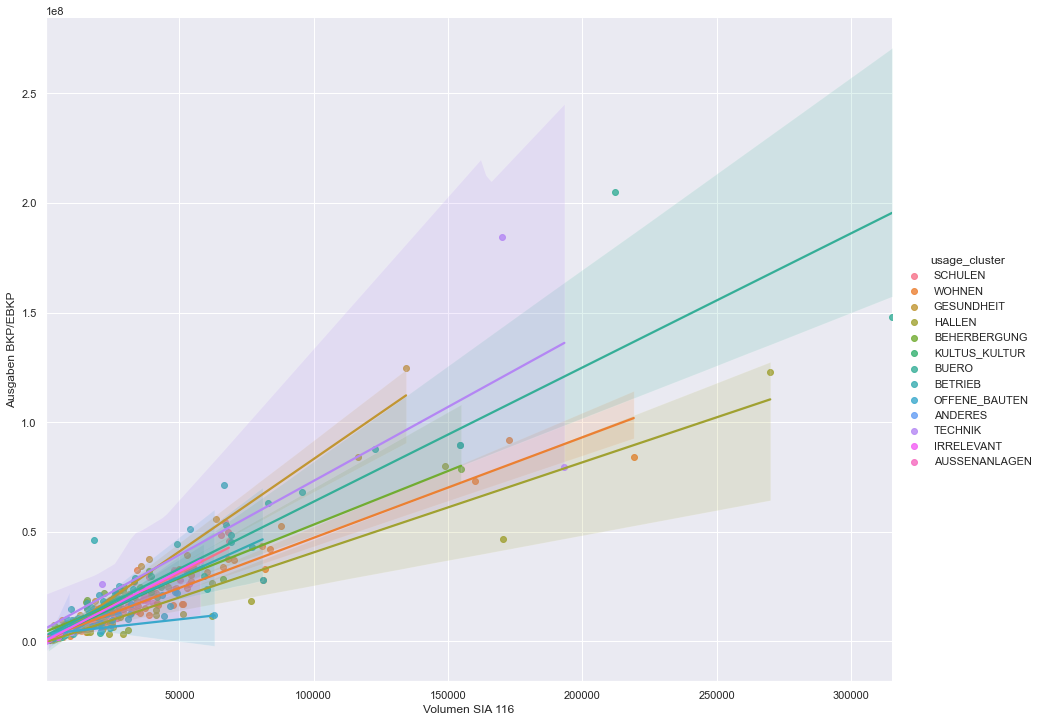

In [50]:
gf = sns.lmplot(
    data=df,
    x=c.FIELD_VOLUME_TOTAL_116, y=c.FIELD_TOTAL_EXPENSES,
    hue=c.FIELD_USAGE_CLUSTER,
    height=charts.CHART_HEIGHT, aspect=charts.CHART_HEIGHT / charts.CHART_WIDTH
)

gf.set(xlabel='Volumen SIA 116', ylabel='Ausgaben BKP/EBKP')